In [1]:
# loading the required libraries 
#Load required libraries
import os
import csv
import tweepy
from tweepy import OAuthHandler
from tweepy import Stream
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = STOP_WORDS
import string
punctuations = string.punctuation
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#set working directory
os.chdir("C:/Users/admin/Documents/Python Files")
os.getcwd()

'C:\\Users\\admin\\Documents\\Python Files'

In [3]:
## Connect Twitter

#Store required keys
consumer_key = ""
consumer_secret = ""
access_key = ""
access_secret = ""

In [4]:
#Establish connection
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

##### 	We have extracted tweets by below trending Hastags
1. 	#BTSWORLD
2. 	#PAKvNZ
3. 	#GOT7onTodayShow
4.  #StepDownCM
5. 	#AjazKhan
6.  #JSWPlatinaLaunch
7. 	#ZeroTrustGovt
8. 	#TheLionKingWithKingKhan
9.  #PrayForKyoani
10. #SecretOfHappyLife
11.	#FridayFeeling
12. #TopGunMaverick
13. #MangalPandey
14. #ICCHallOfFame
15. Cats

In [24]:
#Extract tweets
#Create empty list
results = []
trending_hastags = ['#MangalPandey','#ICCHallOfFame']
for i in trending_hastags:
    #Get the first 500 items based on the search query
    for tweet in tweepy.Cursor(api.search,q=i,lang="en").items(600):
        results.append(tweet)

In [25]:
# Verify the number of items returned
print (len(results))

932


In [26]:
#Convert list into dataframe
def toDataFrame(tweets):
    #Create empty data frame
    DataSet = pd.DataFrame()
    
    #extract relevant information
    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]
    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userCreateDt'] = [tweet.user.created_at for tweet in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet in tweets]

    return DataSet

In [27]:
#Pass the tweets list to the above function to create a DataFrame
DataSet = toDataFrame(results)

In [28]:
DataSet.head(5)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
0,1152069456723496968,Tributes to the great freedom fighter #mangalp...,0,0,Twitter for Android,2019-07-19 04:15:37,930069721147432963,Chiraggarg216,Chirag Agrawal,2017-11-13 13:47:56,Nothing ventured nothing gained,9,158,"Madhya Pradesh, India",None
1,1152069255942164480,RT @IndiaToday: Remembering freedom fighter #M...,9,0,Twitter for Android,2019-07-19 04:14:49,897489661249019904,aarthiyuvraj,Aarthiyuvraj,2017-08-15 16:06:24,"From chidambaram, I love my sisters, I m ECE...",0,43,"Pondicherry, India",None
2,1152069083459805185,RT @Sunil_Deodhar: Tributes to legendary freed...,35,0,Twitter for Android,2019-07-19 04:14:08,883942532920602624,Tinku26,Ravi Ranjan Shukla,2017-07-09 06:54:57,भारत की सभी समस्याओं का समाधान है जनसंख्या निय...,376,173,"मुजफ्फरपुर,बिहार",None
3,1152068781478256646,Mangal Pandey biography : Life and revolt of 1...,0,1,Twitter Web App,2019-07-19 04:12:56,2914923829,VishalGadaraCC,Vishal Gadara,2014-11-30 16:21:13,my born may be normal but death must be histor...,18346,13327,"Rajkot, India",None
4,1152068752533405696,RT @IndiaToday: Remembering freedom fighter #M...,9,0,Twitter for Android,2019-07-19 04:12:49,1131294404872794112,Rahul7132053107,Rahul,2019-05-22 20:22:59,,10,385,,None


In [29]:
DataSet.to_csv('tweeterDataset6.csv')

In [30]:
#Load Text data
a = pd.read_csv("tweeterDataset.csv")
b = pd.read_csv("tweeterDataset1.csv")
c = pd.read_csv("tweeterDataset2.csv")
d = pd.read_csv("tweeterDataset3.csv")
e = pd.read_csv("tweeterDataset4.csv")
f = pd.read_csv("tweeterDataset5.csv")
g = pd.read_csv("tweeterDataset6.csv")

In [31]:
dataset = pd.concat([a,b,c,d,e,f,g],ignore_index=True)

In [32]:
dataset.head(5)

,Unnamed: 0,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
0,0,1143919690743341056,RT @softwhoseok: me explaining to namjoon and ...,169,0,Twitter for Android,2019-06-26 16:31:21,192224155,owenthesaintss,✨ hope right here✨,2010-09-18 14:48:44,FUCK your zodiac sign what’s your name what ex...,547,421,NaN,NaN
1,1,1143919690718334976,RT @agustshoongi: Me before #BTSWORLD: any one...,389,0,Twitter for Android,2019-06-26 16:31:21,1141749496755499011,reveluv_exe,Gabi$ 🤡 #ATEEZ2ndWin ಥ‿ಥ,2019-06-20 16:47:47,to__##JIMINIE : I will be your manager on bts ...,20,55,was created 20/06/19,NaN
2,2,1143919690407956483,RT @guroderes: i drew my personal interpretati...,3785,0,Twitter for iPhone,2019-06-26 16:31:21,3234322494,whozhaechann,ThaYsPetAcuLaR Viu o jk voando 25/05,2015-06-02 23:45:29,If teardrops could be bottled? 🥀{fã account} @...,7169,7142,"Rio de Janeiro, Brasil",NaN
3,3,1143919689786990594,RT @btsworIdwide: #BTSWORLD Update:\n\nARMY: a...,263,0,Twitter Web App,2019-06-26 16:31:21,1127776211214655489,chilachiara,Chila,2019-05-13 03:22:56,I dont care,4,17,NaN,NaN
4,4,1143919689619398656,RT @sugasaward: Me chasing seokjin to audition...,1217,0,Twitter Web App,2019-06-26 16:31:21,1113918609275990016,LeilaXBangtan,Leila🔥,2019-04-04 21:37:46,NaN,716,4442,NaN,NaN


In [33]:
dataset.shape

(8812, 16)

In [89]:
df = dataset.copy()

In [90]:
df.columns

Index(['Unnamed: 0', 'tweetID', 'tweetText', 'tweetRetweetCt',
       'tweetFavoriteCt', 'tweetSource', 'tweetCreated', 'userID',
       'userScreen', 'userName', 'userCreateDt', 'userDesc', 'userFollowerCt',
       'userFriendsCt', 'userLocation', 'userTimezone'],
      dtype='object')

In [91]:
# let's remove the features which are not required 
df = df.drop(['Unnamed: 0', 'tweetID', 'tweetSource', 'tweetCreated', 'userID',
       'userScreen', 'userName', 'userCreateDt', 'userDesc', 'userLocation', 'userTimezone'],axis = 1)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8812 entries, 0 to 8811
Data columns (total 5 columns):
tweetText          8812 non-null object
tweetRetweetCt     8812 non-null int64
tweetFavoriteCt    8812 non-null int64
userFollowerCt     8812 non-null int64
userFriendsCt      8812 non-null int64
dtypes: int64(4), object(1)
memory usage: 344.3+ KB


In [93]:
df.describe()

,tweetRetweetCt,tweetFavoriteCt,userFollowerCt,userFriendsCt
count,8812.000000,8812.000000,8.812000e+03,8.812000e+03
mean,839.890831,0.354630,5.534934e+03,1.320837e+03
std,3192.710062,3.228533,1.331104e+05,2.129119e+04
min,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,4.800000e+01,9.300000e+01
50%,19.000000,0.000000,1.855000e+02,2.740000e+02
75%,371.250000,0.000000,7.842500e+02,7.910000e+02
max,118799.000000,133.000000,7.847621e+06,1.780298e+06


###### let' feature engineer features like : 
- Length of tweet (1 to 140 characters) 
- Average word length in tweet 
- Number of #hashtags 
- Number of @mentions 
- Number of links  

In [94]:
def length_of_tweet(tweet):
    return len(tweet)

In [95]:
def avg_len(length):
    return length/sum(df['length_of_tweet'])

In [96]:
def num_hastags(tweet):
    count = 0
    words = tweet.split()
    for word in words:
        if word[:1] == '#' and len(word)>1:
            count+=1
    return count

In [97]:
def num_mentions(tweet):
    words = tweet.split()
    count = 0
    for word in words:
        if word[:1] == '@' and len(word)>1:
            count+=1
    return count

In [98]:
def num_links(tweet):
    words = tweet.split()
    count = 0
    for word in words:
        if word[:5] == 'https' and len(word)>5:
            count+=1
    return count

In [99]:
df['num_links'] = df['tweetText'].apply(num_links)
df['num_mentions'] = df['tweetText'].apply(num_mentions)
df['num_hastags'] = df['tweetText'].apply(num_hastags)
df['length_of_tweet'] = df['tweetText'].apply(length_of_tweet)

In [100]:
df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,userFollowerCt,userFriendsCt,num_links,num_mentions,num_hastags,length_of_tweet
0,RT @softwhoseok: me explaining to namjoon and ...,169,0,547,421,1,1,1,140
1,RT @agustshoongi: Me before #BTSWORLD: any one...,389,0,20,55,0,1,1,140
2,RT @guroderes: i drew my personal interpretati...,3785,0,7169,7142,1,1,2,121
3,RT @btsworIdwide: #BTSWORLD Update:\n\nARMY: a...,263,0,4,17,0,1,2,140
4,RT @sugasaward: Me chasing seokjin to audition...,1217,0,716,4442,1,1,1,93


In [101]:
df.describe()

,tweetRetweetCt,tweetFavoriteCt,userFollowerCt,userFriendsCt,num_links,num_mentions,num_hastags,length_of_tweet
count,8812.000000,8812.000000,8.812000e+03,8.812000e+03,8812.000000,8812.000000,8812.000000,8812.000000
mean,839.890831,0.354630,5.534934e+03,1.320837e+03,0.447571,1.005901,1.048570,123.100431
std,3192.710062,3.228533,1.331104e+05,2.129119e+04,0.532965,0.859939,1.282536,27.738578
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,4.000000
25%,0.000000,0.000000,4.800000e+01,9.300000e+01,0.000000,1.000000,0.000000,113.000000
50%,19.000000,0.000000,1.855000e+02,2.740000e+02,0.000000,1.000000,1.000000,140.000000
75%,371.250000,0.000000,7.842500e+02,7.910000e+02,1.000000,1.000000,1.000000,140.000000
max,118799.000000,133.000000,7.847621e+06,1.780298e+06,2.000000,12.000000,13.000000,148.000000


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8812 entries, 0 to 8811
Data columns (total 9 columns):
tweetText          8812 non-null object
tweetRetweetCt     8812 non-null int64
tweetFavoriteCt    8812 non-null int64
userFollowerCt     8812 non-null int64
userFriendsCt      8812 non-null int64
num_links          8812 non-null int64
num_mentions       8812 non-null int64
num_hastags        8812 non-null int64
length_of_tweet    8812 non-null int64
dtypes: int64(8), object(1)
memory usage: 619.7+ KB


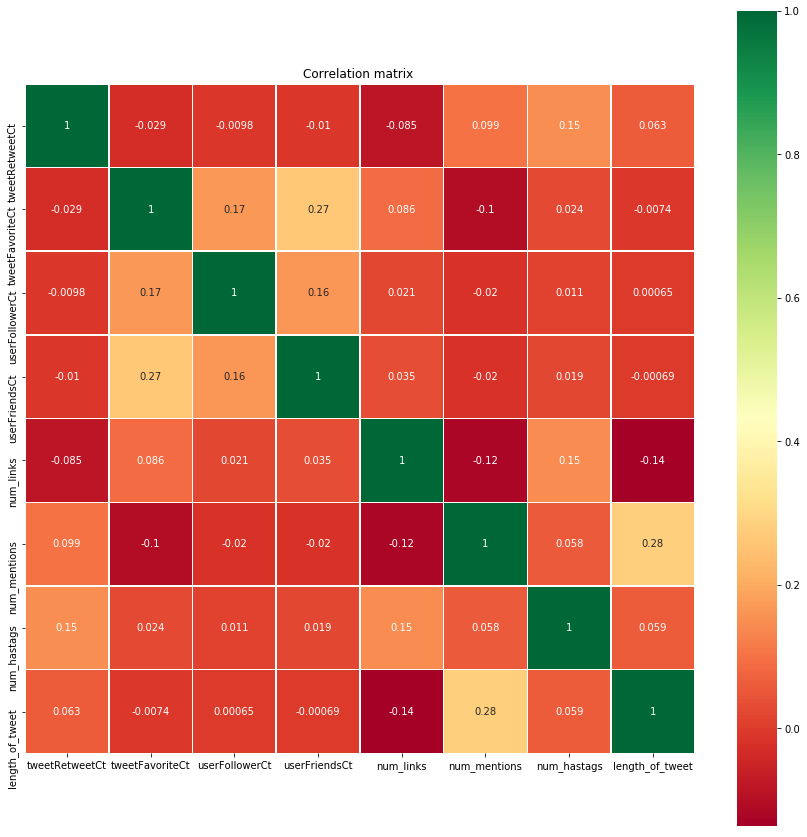

In [103]:
# heatmap using correlation matrix
plt.figure(figsize=(15,15))
_ = sns.heatmap(df[['tweetRetweetCt','tweetFavoriteCt','userFollowerCt','userFriendsCt','num_links','num_mentions','num_hastags','length_of_tweet']].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')
# plt.savefig('correlation.png')
plt.show()

In [104]:
df['score'] = df['tweetRetweetCt']+df['tweetFavoriteCt']+df['userFollowerCt']+df['userFriendsCt']+df['num_links']+df['num_mentions']+df['num_hastags']+df['length_of_tweet']

In [105]:
# Normalizing score values in range 0 to 100
df['score'] = (df['score'] - min(df['score']))/(max(df['score']) - min(df['score']))*100

In [106]:
df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,userFollowerCt,userFriendsCt,num_links,num_mentions,num_hastags,length_of_tweet,score
0,RT @softwhoseok: me explaining to namjoon and ...,169,0,547,421,1,1,1,140,0.016079
1,RT @agustshoongi: Me before #BTSWORLD: any one...,389,0,20,55,0,1,1,140,0.007492
2,RT @guroderes: i drew my personal interpretati...,3785,0,7169,7142,1,1,2,121,0.231921
3,RT @btsworIdwide: #BTSWORLD Update:\n\nARMY: a...,263,0,4,17,0,1,2,140,0.005211
4,RT @sugasaward: Me chasing seokjin to audition...,1217,0,716,4442,1,1,1,93,0.082217


In [107]:
df.describe()

,tweetRetweetCt,tweetFavoriteCt,userFollowerCt,userFriendsCt,num_links,num_mentions,num_hastags,length_of_tweet,score
count,8812.000000,8812.000000,8.812000e+03,8.812000e+03,8812.000000,8812.000000,8812.000000,8812.000000,8812.000000
mean,839.890831,0.354630,5.534934e+03,1.320837e+03,0.447571,1.005901,1.048570,123.100431,0.099424
std,3192.710062,3.228533,1.331104e+05,2.129119e+04,0.532965,0.859939,1.282536,27.738578,1.760754
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,4.800000e+01,9.300000e+01,0.000000,1.000000,0.000000,113.000000,0.005874
50%,19.000000,0.000000,1.855000e+02,2.740000e+02,0.000000,1.000000,1.000000,140.000000,0.017066
75%,371.250000,0.000000,7.842500e+02,7.910000e+02,1.000000,1.000000,1.000000,140.000000,0.042608
max,118799.000000,133.000000,7.847621e+06,1.780298e+06,2.000000,12.000000,13.000000,148.000000,100.000000


In [114]:
df[df['score']>10]

,tweetText,tweetRetweetCt,tweetFavoriteCt,userFollowerCt,userFriendsCt,num_links,num_mentions,num_hastags,length_of_tweet,score
4327,Cats movie trailer: internet reacts in horror ...,1,2,7847621,1086,1,0,0,96,100.000000
6410,It's all downhill \n\nfrom here...\n\n⛰\n\n#Th...,2,3,601870,586145,1,1,2,122,15.137724
6831,Good Morning Beautiful People 🌞 \nHow to react...,16,47,1777138,1780298,1,0,2,116,45.326738
7132,It's all downhill \n\nfrom here...\n\n⛰\n\n#Th...,53,130,601877,586145,1,1,2,122,15.140081
7597,RT @htshowbiz: #TopGunMaverick trailer: #TomCr...,2,0,6823204,129,0,1,2,140,86.936469
7629,RT @ieEntertainment: The trailer of #TomCruise...,2,0,3145969,396,1,1,2,115,40.088579
7901,RT @IndiaToday: Remembering freedom fighter #M...,9,0,1108933,118,1,1,2,140,14.131938
7904,"Remembering freedom fighter #MangalPandey, the...",9,43,5258452,231,1,0,2,129,67.002043
7954,Remembering the Brave Indian freedom fighter #...,20,94,1510470,332,1,0,1,140,19.251887
8034,#MangalPandey’s act of rebellion and subsequen...,10,28,948450,199,1,0,1,140,12.088629


In [121]:
row_num = [4327, 6410, 6831, 7132, 7597, 7629, 7901, 7904, 7954, 8034]

In [122]:
dataset.iloc[8034,1]

1152057976620032000

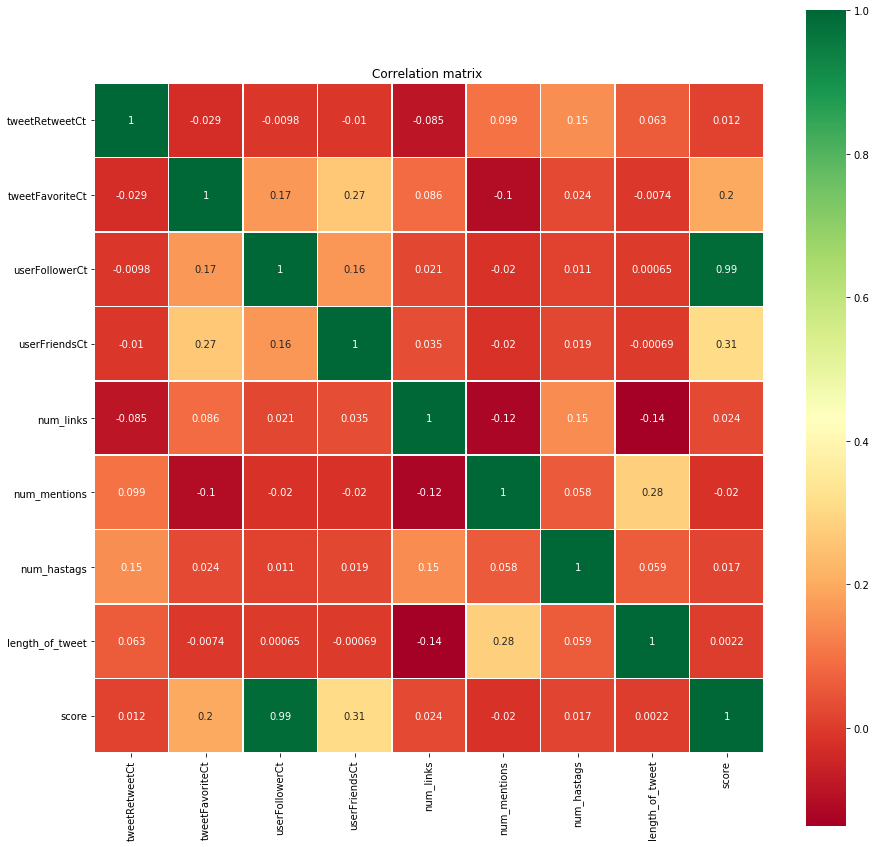

In [54]:
# heatmap using correlation matrix
plt.figure(figsize=(15,15))
_ = sns.heatmap(df[['tweetRetweetCt','tweetFavoriteCt','userFollowerCt','userFriendsCt','num_links','num_mentions','num_hastags','length_of_tweet','score']].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')
# plt.savefig('correlation.png')
plt.show()

In [55]:
df.drop(df.columns.difference(['tweetText','score']), 1, inplace=True)

In [56]:
df.head()

,tweetText,score
0,RT @softwhoseok: me explaining to namjoon and ...,0.016079
1,RT @agustshoongi: Me before #BTSWORLD: any one...,0.007492
2,RT @guroderes: i drew my personal interpretati...,0.231921
3,RT @btsworIdwide: #BTSWORLD Update:\n\nARMY: a...,0.005211
4,RT @sugasaward: Me chasing seokjin to audition...,0.082217


In [57]:
# create the nlp object using Spacy's English language class
nlp = English()

In [58]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)

    # here the token is converted into lowercase if it is a Pronoun and if it is not a Pronoun then it is lemmatized and lowercased    
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words using stopword from spacy library and punctuations from string library
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [59]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [80]:
# bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
# Creating the Bag of Words model
bow_vector = CountVectorizer(max_features = 100,tokenizer = spacy_tokenizer,ngram_range=(4,5))

# Separating labels and features

In [71]:
X = df.drop('score',axis=1).values
y = df['score'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state=42)
print(df.shape, X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(8812, 2) (8723, 1) (89, 1) (8723,) (89,)


In [ ]:
# Xtrain = train.iloc[0:rows_train,1:]
# Xtest = train.iloc[rows_train:,1:]
# ytrain = train.iloc[0:rows_train,0]
# ytest = train.iloc[rows_train:,0]

In [72]:
X_train = X_train.ravel()

In [73]:
X_train.shape

(8723,)

In [74]:
X_test = X_test.ravel()

In [75]:
X_test.shape

(89,)

In [76]:
y_train.shape

(8723,)

In [77]:
X_train

array(['RT @sunilkapoor8: Salute @ashokepandit for d complaint against #AjazKhan,  arrested. #Judge should ask him to distribute of 500 copies of #…',
       'RT @akidearest: Thank you for bringing us some of the best anime we’ve had the pleasure of watching. #PrayForKyoani https://t.co/8OuhN6yaEm',
       'Has there been any difference with your party elected twice with overwhelming majority @ShobhaBJP ji? It has actual… https://t.co/FFHkfaYuHK',
       ...,
       'RT @FactsDevito: i for one think the new Cats movie looks fantastic https://t.co/Nk0pJOSW6K',
       'Next: M Santner\nPAK 89/2 21.1 Ov\nNZ 237/6 50.0 Ov\nB Azam 36(44), M Hafeez 24(44)\n149 runs required from 173 balls… https://t.co/txa53Y8PUG',
       'Tribute to Shaheed #mangalpandey ji on his birth anniversary.\n\n#SecretOfHappyLife #FridayFeeling https://t.co/zGSIaB8D9l'],
      dtype=object)

In [78]:
xgboost = XGBRegressor()

In [81]:
# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('tfidf',TfidfTransformer()),
                 ('regressor', xgboost)])

# model generation
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('cleaner', <__main__.predictors object at 0x00000225E9E3C588>), ('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100, min_df=1,
       ...lpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1))])

In [93]:
pred = pipe.predict(X_test)

#### Retweet tweets

In [ ]:
## Connect Twitter

#Store required keys
consumer_key = ""
consumer_secret = ""
access_key = ""
access_secret = ""

#Establish connection
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [ ]:
import time
for row in row_num:
    tweetid = dataset.iloc[row,1]
    print(tweetid)  
    api.retweet(tweetid) 
    time.sleep(3600)